In [190]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np         
from sklearn import preprocessing
from sklearn import utils
from numpy import inf

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import seaborn as sns; sns.set()

In [2]:
data1 = pd.read_csv("/Users/wxt2753/Downloads/bsNET140513_032310.csv")
data2 = pd.read_csv("/Users/wxt2753/Downloads/bs140513_032310.csv")

In [3]:
# data2.dtypes
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
step           594643 non-null int64
customer       594643 non-null object
age            594643 non-null object
gender         594643 non-null object
zipcodeOri     594643 non-null object
merchant       594643 non-null object
zipMerchant    594643 non-null object
category       594643 non-null object
amount         594643 non-null float64
fraud          594643 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [162]:
pd.DataFrame(data2.columns)

,0
0,step
1,customer
2,age
3,gender
4,zipcodeOri
5,merchant
6,zipMerchant
7,category
8,amount
9,fraud


In [5]:
data1.head()

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [6]:
data2.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


# Transformation

In [290]:
#Transform to Category

data2['customer_code'] = data2['customer'].astype('category').cat.codes
data2['merchant_code'] = data2['merchant'].astype('category').cat.codes
data2['gender_code'] = data2['gender'].astype('category').cat.codes
data2['age_code'] = data2['age'].astype('category').cat.codes
data2['category_code'] = data2['category'].astype('category').cat.codes

# data2['category'].unique()
# data2['category'].hist()
data2.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,customer_code,merchant_code,gender_code,age_code,category_code
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,210,30,2,4,12
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,2753,30,2,2,12
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,2285,18,1,4,12
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,1650,30,2,3,12
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,3585,30,2,5,12


# EDA

In [7]:
#check missing data

data1.isnull().sum()

Source       0
Target       0
Weight       0
typeTrans    0
fraud        0
dtype: int64

In [8]:
# check missing data

data2.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [147]:
data2.describe()

,step,amount,fraud,customer_code,merchant_code,gender_code,age_code,category_code
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108,2042.317776,23.866580,1.451089,3.014151,11.066393
std,51.053632,111.402831,0.109369,1185.491845,8.590215,0.503291,1.335884,2.817118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000,1020.000000,18.000000,1.000000,2.000000,12.000000
50%,97.000000,26.900000,0.000000,2030.000000,18.000000,1.000000,3.000000,12.000000
75%,139.000000,42.540000,0.000000,3059.000000,30.000000,2.000000,4.000000,12.000000
max,179.000000,8329.960000,1.000000,4111.000000,49.000000,3.000000,7.000000,14.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25c41c18>,
      dtype=object)

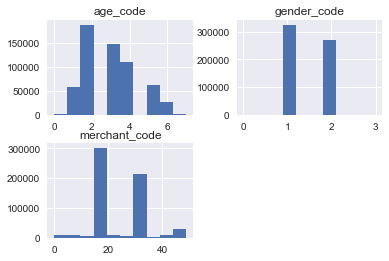

In [153]:
data2[['gender_code', 'age_code' ,'merchant_code']].hist()

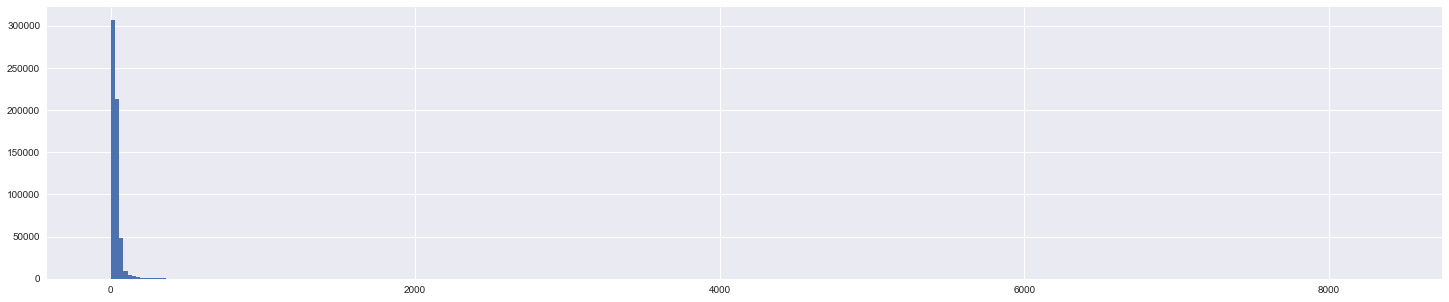

In [17]:
fig = plt.figure(figsize = (25,5))
#fig, axes = plt.subplots(nrows=1, ncols=2)
ax = fig.gca()
data2["amount"].hist(bins=300)

In [156]:
#long tail 

data2["amount"].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

In [146]:
data = {'raw': ['Age 0 is <= 18',
                'Age 1 is 19 - 25',
                'Age 2 is 26 - 35',
                'Age 3 is 36 - 45',
                'Age 4 is 46 - 55',
                'Age 5 is 56 - 65',
                'Age 6 is >65',
                'Age U is undefied'
               ]}
df = pd.DataFrame(data, columns = ['raw'])
df

,raw
0,Age 0 is <= 18
1,Age 1 is 19 - 25
2,Age 2 is 26 - 35
3,Age 3 is 36 - 45
4,Age 4 is 46 - 55
5,Age 5 is 56 - 65
6,Age 6 is >65
7,Age U is undefied


In [157]:
#594k in total

data2["age_code"].describe()

count    594643.000000
mean          3.014151
std           1.335884
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: age_code, dtype: float64

Spending distribution at different age groups 

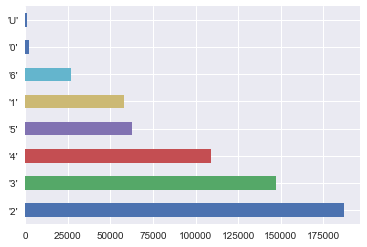

In [155]:
data2['age'].value_counts().plot(kind='barh')

Transaction at different age groups

In [21]:
data2['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

In [22]:
data2["gender"].describe()

count     594643
unique         4
top          'F'
freq      324565
Name: gender, dtype: object

# Spending Distribution by customer demographics 

Spending by gender

In [129]:
data2.groupby('gender_code')[['amount']].describe()

amount                                                       \
                count       mean         std   min      25%    50%     75%   
gender_code                                                                  
0              1178.0  36.627623   55.069172  0.00  13.0825  27.22  42.455   
1            324565.0  39.213044  121.169602  0.00  13.8300  27.00  42.730   
2            268385.0  36.308094   98.600233  0.00  13.6300  26.78  42.310   
3               515.0  31.508932   31.914246  0.11  11.3800  25.15  42.630   

                      
                 max  
gender_code           
0            1215.63  
1            7665.56  
2            8329.96  
3             306.80

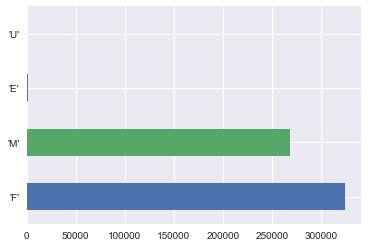

In [23]:
data2['gender'].value_counts().plot(kind='barh')

#slightly higher

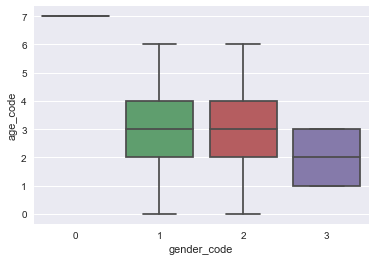

In [28]:
#evenly
ax = sns.boxplot(x="gender_code", y="age_code", data=data2)

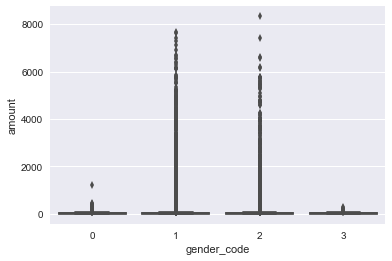

In [30]:
#long tail 

ax = sns.boxplot(x="gender_code", y="amount", data=data2)

Spending by Category

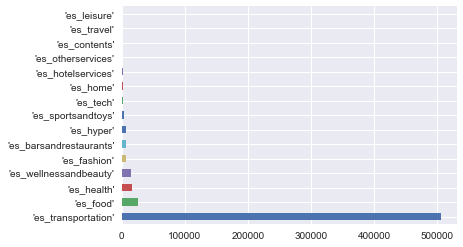

In [27]:
#skewed

data2['category'].value_counts().plot(kind='barh')

Transfer to Category 

In [26]:
# data2[['category','category_code' ]]
pd.unique(data2[['category']].values.ravel('K'))
pd.unique(data2[['category','category_code']].values.ravel('K'))

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'", 12, 4, 9, 3, 6, 0, 11, 10, 14, 7, 2,
       5, 1, 13, 8], dtype=object)

Spending by age, Boxplot and Outlier 

In [128]:
#even mean in age group 

data2.groupby('age_code')[['amount']].describe()

amount                                                         \
             count       mean         std   min      25%     50%      75%   
age_code                                                                    
0           2452.0  46.602896  146.118480  0.02  14.5775  28.305  44.7075   
1          58131.0  37.530909  107.821610  0.00  13.6600  26.920  42.5300   
2         187310.0  38.358458  122.970239  0.00  13.8000  26.940  42.5100   
3         147131.0  37.879718  107.359732  0.00  13.7200  26.950  42.6300   
4         109025.0  38.201522  108.004893  0.00  13.7300  26.900  42.6900   
5          62642.0  36.426231   93.434816  0.00  13.6800  26.630  42.1600   
6          26774.0  36.865624  106.007546  0.00  13.7800  26.795  42.3975   
7           1178.0  36.627623   55.069172  0.00  13.0825  27.220  42.4550   

                   
              max  
age_code           
0         4170.56  
1         7134.39  
2         8329.96  
3         6679.23  
4         6260.89  
5         6590.61  
6         7432.48  
7         1215.63

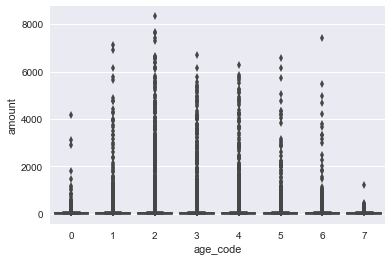

In [159]:
#big/business group? 

ax = sns.boxplot(x="age_code", y="amount", data=data2)

In [280]:
#hexbin chart
#hex = data2.plot.hexbin(x='gender_code', y='age_code', gridsize=20) 

In [281]:
#gen_amount = data2.plot.hexbin(x='gender_code', y='amount', gridsize=20)

In [282]:
#age_amount = data2.plot.hexbin(x='age_code', y='amount', gridsize=20)

Distribution by Category 

In [54]:
# Amount, gender by category
#focus on category of "food" & "bar and restaurant"

data2['category']= data2['category'].astype('object')
print("Avg Spending per Category")
print(data2.groupby('category')['amount','age_code','gender_code'].mean())

Avg Spending per Category
                              amount  age_code  gender_code
category                                                   
'es_barsandrestaurants'    43.461014  3.013965     1.440923
'es_contents'              44.547571  2.924294     1.487006
'es_fashion'               65.666642  3.009297     1.437558
'es_food'                  37.070405  2.992649     1.450636
'es_health'               135.621367  2.967954     1.419885
'es_home'                 165.670846  3.013092     1.433535
'es_hotelservices'        205.614249  3.004014     1.416284
'es_hyper'                 45.970421  3.064447     1.447032
'es_leisure'              288.911303  2.987976     1.350701
'es_otherservices'        135.881524  2.976974     1.442982
'es_sportsandtoys'        215.715280  3.022739     1.387806
'es_tech'                 120.947937  2.970886     1.448523
'es_transportation'        26.958187  3.016911     1.453675
'es_travel'              2250.409190  2.953297     1.373626
'es_wellnessan

In [134]:
print("Avg Spending for Food ")
print(data2[(data2['category_code']== 0)| (data2['category_code']== 3)].groupby('category')['amount','age','gender'].mean())

Avg Spending for Food 
                            amount
category                          
'es_barsandrestaurants'  43.461014
'es_food'                37.070405


# Focus on only "Food" & "Bar & Restanrant" spendings to conduct restaurant proposal

In [55]:
# Food & Restaunrant only transactions 

resbar_only = (data2['category_code']== 0)
food_only = (data2['category_code']== 3)
Res_food_only = data2[(data2['category_code']== 0)| (data2['category_code']== 3)]
Res_food_only.describe()

,step,amount,fraud,customer_code,merchant_code,gender_code,age_code,category_code
count,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000,32627.000000
mean,100.871763,38.318676,0.003678,2033.305974,37.968155,1.448739,2.996812,2.414013
std,49.912995,28.237227,0.060535,1184.322024,14.272555,0.503924,1.326025,1.189380
min,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,61.000000,17.000000,0.000000,1027.000000,45.000000,1.000000,2.000000,3.000000
50%,106.000000,33.980000,0.000000,2014.000000,45.000000,1.000000,3.000000,3.000000
75%,144.000000,54.850000,0.000000,3049.000000,45.000000,2.000000,4.000000,3.000000
max,179.000000,695.630000,1.000000,4111.000000,45.000000,3.000000,7.000000,3.000000


In [160]:
food_res_avg = sum(Res_food_only['amount']) / len(Res_food_only)
print("Causeway bay's food & bar, restaurant average spending is", food_res_avg)

Causeway bay's food & bar, restaurant average spending is 38.31867624973174


In [283]:
#print(Res_food_only.groupby('age') ['amount','gender',].mean())

# Hypothesis Testing 

# Is restaurant spending behavior significantly different from credit card spending behavior on statistics?

In [136]:
#distribution transformation 

logFood__res_amt = np.log(Res_food_only['amount'])
logFood__res_amt[logFood__res_amt == -inf] = 0

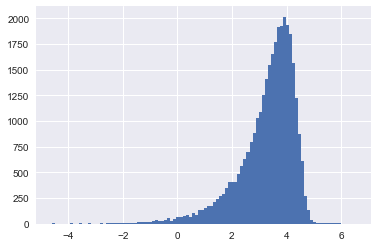

In [85]:
logFood__res_amt.hist(bins=100)

In [237]:
#Japanese restaurant's simulated sampling group 

ran1 = np.random.randint(25, 38.31867624973174, 25)    
ran2 = np.random.randint(38.31867624973174, 300, 5)
sample_set = np.concatenate((ran1, ran2))
print("sampled group of customers' spendings", sample_set)
sample = np.mean(np.concatenate((ran1, ran2)))
print("sampled group's average spending"sample)

group of customers' spendings [ 34  36  35  37  33  27  35  27  31  37  33  37  26  26  32  29  34  28
  35  35  30  34  28  29  26 205 200 171  53 295]
57.266666666666666


In [285]:
#two sample t-test, 95% of confidence interval

ttest,pval = ttest_ind(logFood__res_amt,np.log(sample_set))
print("p-value",pval)
if pval <0.05:
  print("HSBC’s credit car spending and JP restaurant spending are significantly different")
else:
  print("HSBC’s credit car spending and JP restaurant spending are significantly different")

p-value 0.02083580612002174
HSBC’s credit car spending and JP restaurant spending are significantly different


# Varialble Importance — measure Variables' importance degree to Spending

In [294]:
#Variable Importance 

X = Res_food_only[['gender_code','age_code','category_code']]
# X = Res_food_only.drop('amount',axis=1)
Y = Res_food_only['amount']

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(Y))
print(utils.multiclass.type_of_target(Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

model_VI = ExtraTreesClassifier()
model_VI.fit(X, training_scores_encoded)

[3239 3618 3632 ... 2243  409 4272]
continuous
multiclass
multiclass


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [295]:
print("'gender_code','age_code','category_code'")
print(model_VI.feature_importances_)

'gender_code','age_code','category_code'
[0.29095252 0.55708184 0.15196564]


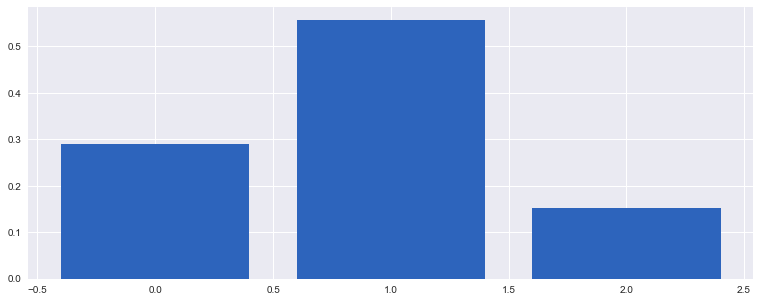

In [296]:
# plotting feature imporance bar-graph
fig2 = plt.figure(figsize=(13,5))

# Generating stacked bar-chart
bars_ft = plt.bar(range(len(model_VI.feature_importances_)), model_VI.feature_importances_, width = .8, color = '#2d64bc')


# Regression based assessment to measure model & features' explanatory powers

In [252]:
# Regression & R-square, P-value 

C = Res_food_only[['gender_code','age_code','category_code']]
A = Res_food_only['amount']

model = sm.OLS(A, C.astype(float))

In [253]:
results = model.fit()

In [254]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 1.654e+04
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:36:28   Log-Likelihood:            -1.5724e+05
No. Observations:               32627   AIC:                         3.145e+05
Df Residuals:                   32624   BIC:                         3.145e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gender_code      12.8364      0.246     52.083

# Propose price groups by optimizing Customer Segmentation

K-means

In [263]:
# get best cluster set 

wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(cluster_set)
    wcss.append(kmeans.inertia_)

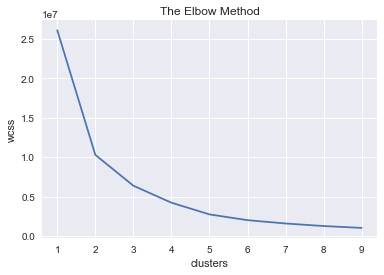

In [264]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [256]:
cluster_set = Res_food_only[['amount','age_code']]
cluster_set=np.array(cluster_set)

In [265]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(cluster_set)

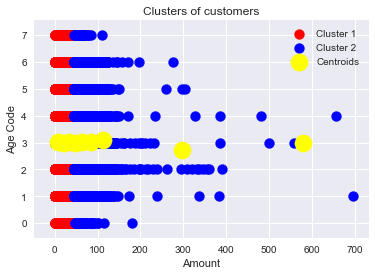

In [266]:
plt.scatter(cluster_set[y_kmeans == 0, 0], cluster_set[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_set[y_kmeans == 1, 0], cluster_set[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(cluster_set[y_kmeans == 2, 0], cluster_set[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(cluster_set[y_kmeans == 3, 0], cluster_set[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(cluster_set[y_kmeans == 4, 0], cluster_set[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Amount')
plt.ylabel('Age Code')
plt.legend()
plt.show()

Conclusion

We found out the Japanese Restaurant's customer behavior and its statistics corresponding to HSBC's customer data property. Average spending is $37, and Avg Food & Restaurant $38. We further want to find out if it's true for the Restaurant. So we set up a strategy hypothesis testing and simulated samples. 

Then based on hypothesis testing we proposed the restaurant can adjust its pricing accordingly. Then we consolidated the importance degree of variables for spending and set up a regression model, examine the variables again and the model’s power. And since customers’ demographic have their own characteristics, we further optimized the appropriate customer segmentation and gain the result.


Extension

Transferring learning 

data aquiring — geolocation, store id, store genra, etc. 

Real-life sampling 

PayMe — Understand the distribution and help establishment in B2P 
